<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_02/CAP417_HandsOn_02_Aurelienne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAP417 - Computational Statistics - 2022** 

**Class 4 - Exercises**

Aurelienne A. S. Jorge

---

# Perfect Linear Relation

In a **Simple Linear Regression**, the relationship between 2 variables, an **independent variable x** and a **dependent variable y**, can be expressed by the equation:

$y = ax + b + \epsilon $

where:

*   $y$ is the dependent variable,
*   $x$ is the independent variable,
*   a is the slope,
*   b is the y-intercept,
*   $\epsilon$ is the statistical error

The examples below intend to illustrate a perfect linear relation, and the outcome of a few variations of the parameters $a$ and $b$. 

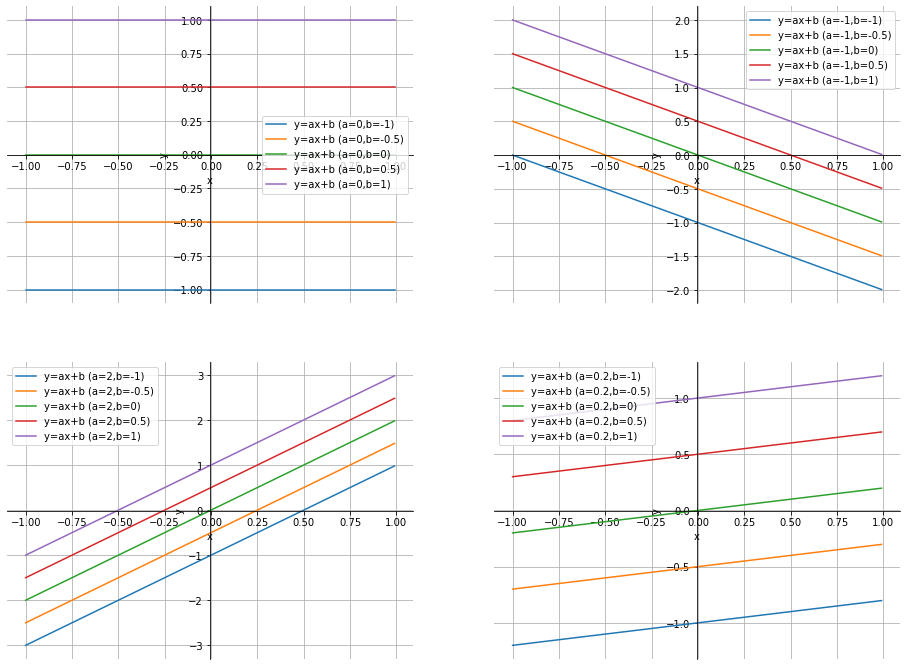

In [ ]:
import numpy
from matplotlib import pyplot as plt


def plot_subplot(a_value, idx_subplot):
  ax = plt.subplot(2,2,idx_subplot)
  # Move y-axis and x-axis to centre
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('center')
  # Eliminate upper and right axes
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')

  a = a_value
  b_list = [-1, -0.5, 0, 0.5, 1]
  x = numpy.arange(-1,1,0.01)
  for b in b_list:
    y = a * x + b
    ax.plot(x, y, label='y=ax+b (a='+str(a)+',b='+str(b)+')')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend()

plt.figure(figsize=(16, 12))
plot_subplot(a_value=0, idx_subplot=1)
plot_subplot(a_value=-1, idx_subplot=2)
plot_subplot(a_value=2, idx_subplot=3)
plot_subplot(a_value=0.2, idx_subplot=4)
plt.show()

# Estimating the parameters

## Analitical Approach

By an analytical approach, it is possible to calculate the parameters $a$ and $b$ of a linear model. The slope ($a$), can be calculated by the angular coefficient of the line, given by:

$a = m = \frac{\Delta Y}{\Delta X}$

Once we know the value of $a$, it is possible to calculate the value of $b$ (the y-intercept), using the coordinates of one known point.

Parameter 'a' (the slope coefficient)= 2.0
Parameter 'b' (the y-intercept) = -1.0



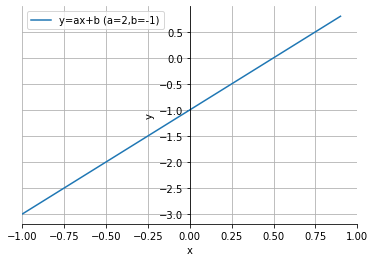

In [ ]:
# Generating x and y values
a = 2
b = -1
x = numpy.arange(-1,1,0.1)
y = a * x + b

# Plot
ax = plt.subplot(1,1,1)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.plot(x, y, label='y=ax+b (a='+str(a)+',b='+str(b)+')')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 1)
plt.grid()
plt.legend()

# Calculating the slope (parameter "a") based on the angular coefficient
delta_y = y[-1] - y[0]
delta_x = x[-1] - x[0]
a = delta_y / delta_x
print("Parameter 'a' (the slope coefficient)= " + str(a))

# Calculating the value of b (the y-intercept) using x0,y0
# a * x0 + b = y0
b = y[0] - a * x[0]
print("Parameter 'b' (the y-intercept) = " + str(b))
print("")



## Exhaustive search

The code below searches for the parameters *a* and *b* that best fit the linear regression model defined in lines 35-38. The ranges of search are given by the lines 41 and 43. The plot indicates the error for each possible combination of *a* and *b*. The code can work with 3 types of error:

*   Mean of Simple Difference
*   Mean Absolute Error
*   Mean Squared Error




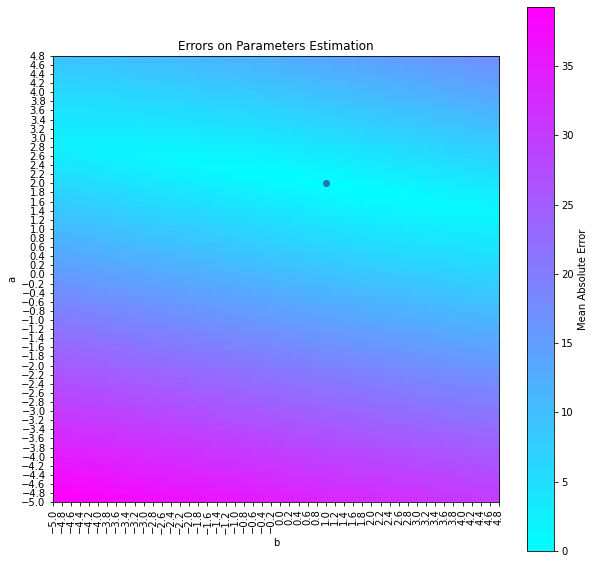

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

def exhaustive_search(error_type, y):
  errors = np.zeros((a_range.shape[0], b_range.shape[0]))
  for i in range(len(a_range)):
    a_ = a_range[i]
    for j in range(len(b_range)):
      b_ = b_range[j]  
      y_pred = a_ * x + b_
      if error_type == 'mae':
        errors[i, j] = mean_absolute_error(y, y_pred)
      elif error_type == 'dif':
        errors[i, j] = np.abs(np.mean(y - y_pred))
      elif error_type == 'mse':
        errors[i, j] = mean_squared_error(y, y_pred)

  return errors

def plot_space_parameters(errors, error_type): 
  plt.figure(figsize=(10,10))
  plt.imshow(np.flip(errors, axis=0), cmap='cool',interpolation="nearest", extent=(np.min(b_range), np.max(b_range), np.min(a_range), np.max(a_range)))
  plt.plot(b,a,'o')
  plt.title( "Errors on Parameters Estimation" )
  plt.xticks(b_range)
  plt.yticks(a_range)
  plt.xticks(rotation=90)
  plt.xlabel('b')
  plt.ylabel('a')
  plt.colorbar(label=error_type)
  plt.show()

# Generating x and y values
a = 2
b = 1
x = numpy.arange(0,10,0.5)
y = a * x + b

# Limits of Parameter a
a_range = np.arange(-5, 5, 0.2)
# Limits of Parameter b
b_range = np.arange(-5, 5, 0.2)

errors = exhaustive_search('mae', y)
plot_space_parameters(errors, "Mean Absolute Error")
#errors = exhaustive_search('dif', y)
#plot_space_parameters(errors, "Mean of Diferences")
#errors = exhaustive_search('mse', y)
#plot_space_parameters(errors, "Mean Squared Difference")

# Noise

The function below generates noise to be applied into a perfect linear relation. It can be applied in either an additive or multiplicative ways.
The noise is a random number picked up from a uniform distribution (*numpy.random.uniform*). The boundaries of the uniform distribution is proportional to the noise intensity pre-defined (line 37).

<y> = 10.5
Var(y) = 33.25

Noise intensity: 0.1
<y_add> = 10.477215729402419
Var(y_add) = 33.631953098693984
<y_mult> = 10.192760822449513
Var(y_mult) = 29.548491235004597

Noise intensity: 0.6
<y_add> = 10.055594188826074
Var(y_add) = 35.335710770088454
<y_mult> = 11.392401761628971
Var(y_mult) = 56.86213804655819



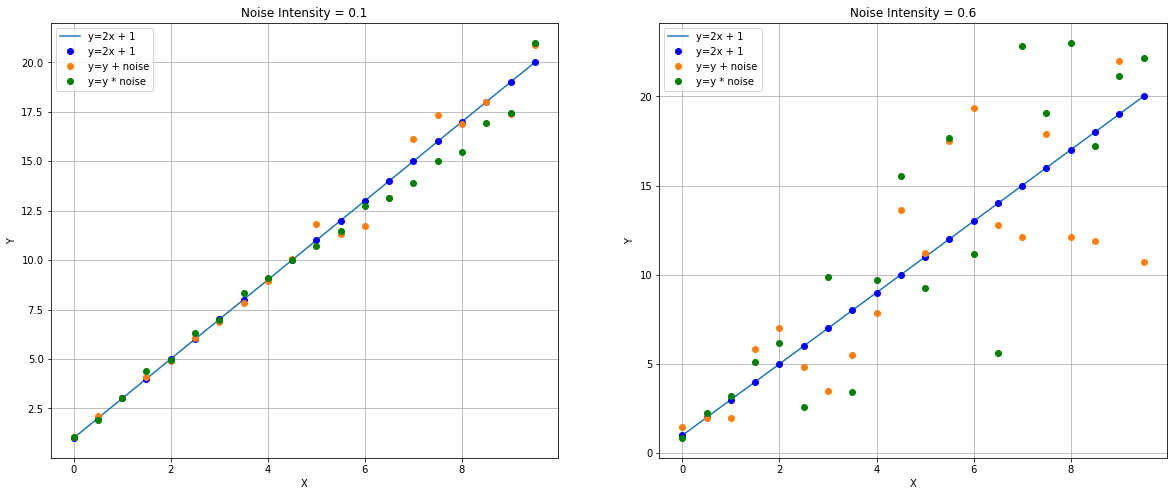

In [ ]:
def generate_noise(noise_intensity, idx_plot):
  # Initializing y with noise
  y_noisy_add = np.zeros(y.shape)
  y_noisy_mult = np.zeros(y.shape)

  # Additive noise
  i = 0
  for y_value in y:
    noise_limit = np.abs(noise_intensity * y_value)
    noise = np.random.uniform(-noise_limit, noise_limit)
    y_noisy_add[i] = y[i] + noise
    i = i + 1
    
  # Multiplicative noise
  i = 0
  noise = np.random.uniform(1-noise_intensity, 1+noise_intensity, size=y.shape)
  y_noisy_mult = y * noise
  
  ax = plt.subplot(1,2,idx_plot)
  #ax.title('Additive and Multiplicative Noises')
  ax.plot(x,y, label="y="+str(a)+"x + "+str(b))
  ax.plot(x,y, 'bo', label="y="+str(a)+"x + "+str(b))
  ax.plot(x,y_noisy_add, 'o', label="y=y + noise")
  ax.plot(x,y_noisy_mult, 'go', label="y=y * noise")
  plt.title("Noise Intensity = "+str(noise_intensity))
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid()
  plt.legend()
  return y_noisy_add, y_noisy_mult

fig = plt.figure(figsize=(20,8))

# Defining levels of Noise Intensity
noise_intensities = [0.1, 0.6]

# Generating noise and plots
idx = 1
print("<y> = "+str(np.mean(y)))
print("Var(y) = "+str(np.var(y)))
print("")
for noise_intensity in noise_intensities:
  print("Noise intensity: "+str(noise_intensity))
  y_noisy_add, y_noisy_mult = generate_noise(noise_intensity, idx)
  print("<y_add> = "+str(np.mean(y_noisy_add)))
  print("Var(y_add) = "+str(np.var(y_noisy_add)))
  print("<y_mult> = "+str(np.mean(y_noisy_mult)))
  print("Var(y_mult) = "+str(np.var(y_noisy_mult)))
  idx = idx + 1
  print("")
plt.show()


# Exhaustive Search on Noisy Data

Min. Error = 3.75723795806966


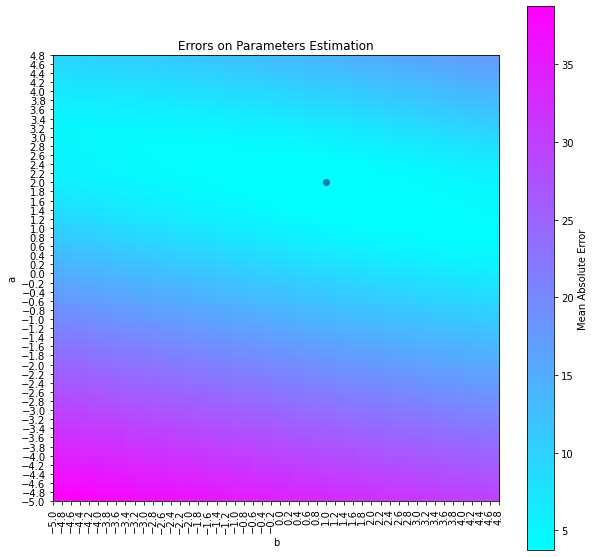

In [ ]:
# Limits of Parameter a
a_range = np.arange(-5, 5, 0.2)
# Limits of Parameter b
b_range = np.arange(-5, 5, 0.2)

errors = exhaustive_search('mae', y_noisy_mult)
print("Min. Error = " + str(np.min(errors)))
plot_space_parameters(errors, "Mean Absolute Error")